1\. **Pandas DataFrame**

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every `x` BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If haven't downloaded it yet, please get the data file with wget
#wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [2]:
import pandas as pd
import numpy as np
filename = "data/data_000637.txt"
data_tot = pd.read_csv(filename)
data = data_tot[0:100000]
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
99995,1,0,64,3869201161,2378,29
99996,1,0,70,3869201161,2472,26
99997,1,0,58,3869201161,2558,0
99998,1,0,57,3869201161,2561,23


2\. Estimate the number of BX in a ORBIT (the value `x`).

*Hint*: check when the BX counter reaches the maximum value before being reset to 0.

In [3]:
df = pd.DataFrame(data)

print(df)

#finding max value
bx_vector = df.loc[:,'BX_COUNTER']
MAXbx = np.max(bx_vector)

print("Maximum value of BX_COUNTER: ",np.max(bx_vector))
print("How many times BX_COUNTER reaches the maximum value of",MAXbx,":",len(bx_vector[bx_vector == MAXbx]))

       HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0         1     0          123  3869200167        2374        26
1         1     0          124  3869200167        2374        27
2         1     0           63  3869200167        2553        28
3         1     0           64  3869200167        2558        19
4         1     0           64  3869200167        2760        25
...     ...   ...          ...         ...         ...       ...
99995     1     0           64  3869201161        2378        29
99996     1     0           70  3869201161        2472        26
99997     1     0           58  3869201161        2558         0
99998     1     0           57  3869201161        2561        23
99999     1     0           56  3869201161        2565        12

[100000 rows x 6 columns]
Maximum value of BX_COUNTER:  3563
How many times BX_COUNTER reaches the maximum value of 3563 : 29


3\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition, and convert the new column to a Time Series.

*Hint:* introduce an offset to the absolute time such that the start of the data acquisition (i.e. the first entry) is zero.

In [4]:
#calculating the time for the inital time (the first row)
#itime = TDC_MEAS*(25/30) + BX_COUNTER*25 + ORBIT_CNT*3564*25 [ns]

itime =  df.iloc[0,5]*(25/30) + df.iloc[0,4]*25 + (df.iloc[0,3]*25*3564)
df['TIME [ns]'] =  (df['TDC_MEAS']*(25/30) + df['BX_COUNTER'] * 25 + df['ORBIT_CNT'] * 25 * 3564) - itime
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME [ns]
0,1,0,123,3869200167,2374,26,0.000000e+00
1,1,0,124,3869200167,2374,27,8.125000e-01
2,1,0,63,3869200167,2553,28,4.476625e+03
3,1,0,64,3869200167,2558,19,4.594125e+03
4,1,0,64,3869200167,2760,25,9.649125e+03
...,...,...,...,...,...,...,...
99995,1,0,64,3869201161,2378,29,8.856550e+07
99996,1,0,70,3869201161,2472,26,8.856785e+07
99997,1,0,58,3869201161,2558,0,8.856998e+07
99998,1,0,57,3869201161,2561,23,8.857007e+07


4\. Find out the duration of the data taking in hours, minutes and seconds, by using the features of the Time Series. Perform this check reading the whole dataset.

In [5]:
df['(d,h,min,s,ms,µs,ns)'] = df["TIME [ns]"].transform(lambda x: pd.Timedelta(x).components)
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME [ns],"(d,h,min,s,ms,µs,ns)"
0,1,0,123,3869200167,2374,26,0.000000e+00,"(0, 0, 0, 0, 0, 0, 0)"
1,1,0,124,3869200167,2374,27,8.125000e-01,"(0, 0, 0, 0, 0, 0, 0)"
2,1,0,63,3869200167,2553,28,4.476625e+03,"(0, 0, 0, 0, 0, 4, 476)"
3,1,0,64,3869200167,2558,19,4.594125e+03,"(0, 0, 0, 0, 0, 4, 594)"
4,1,0,64,3869200167,2760,25,9.649125e+03,"(0, 0, 0, 0, 0, 9, 649)"
...,...,...,...,...,...,...,...,...
99995,1,0,64,3869201161,2378,29,8.856550e+07,"(0, 0, 0, 0, 88, 565, 502)"
99996,1,0,70,3869201161,2472,26,8.856785e+07,"(0, 0, 0, 0, 88, 567, 850)"
99997,1,0,58,3869201161,2558,0,8.856998e+07,"(0, 0, 0, 0, 88, 569, 978)"
99998,1,0,57,3869201161,2561,23,8.857007e+07,"(0, 0, 0, 0, 88, 570, 72)"


5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [6]:
#find the tot TDC_MEAS for each channel 
data = data_tot[0:100000]
dfa = pd.DataFrame(data)
dfa['TDC_COUNT_TOT'] = dfa.groupby('TDC_CHANNEL')['TDC_MEAS'].transform(np.sum)

#sort the channel in order to find the top 3 with most counts 
dfa_sorted = dfa.sort_values(by="TDC_COUNT_TOT", ascending=False)

tdc_channels = dfa_sorted['TDC_CHANNEL'].unique()
tdc_counts_tot = dfa_sorted['TDC_COUNT_TOT'].unique()

print("The TDC channels with most counts are: ")
print(tdc_channels[0], "with",tdc_counts_tot[0]," total TDC counts" )
print(tdc_channels[1], "with",tdc_counts_tot[1],"total TDC counts" )
print(tdc_channels[2], "with",tdc_counts_tot[2],"total TDC counts" )


The TDC channels with most counts are: 
64 with 73208  total TDC counts
63 with 71086 total TDC counts
61 with 56012 total TDC counts


/tmp/ipykernel_5555/2406988067.py:4: FutureWarning: The provided callable <function sum at 0x7f5e001232e0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  dfa['TDC_COUNT_TOT'] = dfa.groupby('TDC_CHANNEL')['TDC_MEAS'].transform(np.sum)


6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit).

In [7]:
orbit_cnt = df['ORBIT_CNT']

non_empty = 0
for i in range(1,len(orbit_cnt)):
    if (orbit_cnt[i] > orbit_cnt[i-1]):
        non_empty += 1
print("The numbers of non-empty orbits are: ", non_empty)

The numbers of non-empty orbits are:  1030


7\. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [8]:
uniq_orbit = (df.loc[:,'ORBIT_CNT'][df.loc[:,'TDC_CHANNEL'] == 139])
print("Number of unique orbit",len(uniq_orbit.unique()))

Number of unique orbit 994


8\. Create two Series (one for each FPGA) that have the TDC channel as index, and the number of counts for the corresponding TDC channel as values.

In [9]:
data = data_tot[0:100000]
dfb = pd.DataFrame(data)

dfb = dfb.drop(columns=['HEAD', 'ORBIT_CNT', 'BX_COUNTER'])

dfb = dfb.groupby(['FPGA', 'TDC_CHANNEL']).sum()

mask0 = np.zeros(len(dfb.index),dtype = bool)
for i in range(len(dfb.index)):
    mask0[i] = (dfb.index[i][0] == 0)
FPGA_0 = dfb[mask0]
FPGA_0 = FPGA_0.reset_index(level='FPGA',drop = True)
serie0 = FPGA_0.squeeze()

mask1 = np.zeros(len(dfb.index),dtype = bool)
for i in range(len(dfb.index)):
    mask1[i] = (dfb.index[i][0] == 1)
FPGA_1 = dfb[mask1]
FPGA_1 = FPGA_1.reset_index(level='FPGA',drop = True)
serie1 = FPGA_1.squeeze()
print("Serie for FPGA 0 \n ",FPGA_0)
print("\n\n")
print("Serie for FPGA 1 \n ",FPGA_1)





Serie for FPGA 0 
               TDC_MEAS
TDC_CHANNEL          
1                1306
2                1581
3                1863
4                2406
5                1635
...               ...
124             19291
130                42
137                 7
138                14
139                 0

[121 rows x 1 columns]



Serie for FPGA 1 
               TDC_MEAS
TDC_CHANNEL          
1               30431
2               35625
3               23905
4               29617
5               17048
...               ...
129                35
130                49
137                28
138                10
139                 0

[132 rows x 1 columns]


9\. **Optional:** Create two histograms (one for each FPGA) that show the number of counts for each TDC channel.

Text(0.5, 1.0, 'Histogram of FPGA 1')

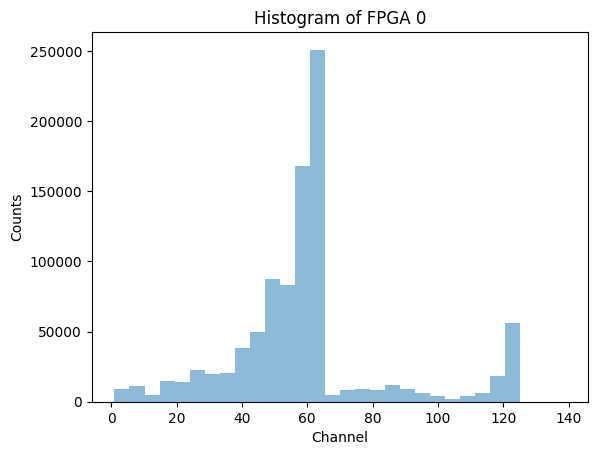

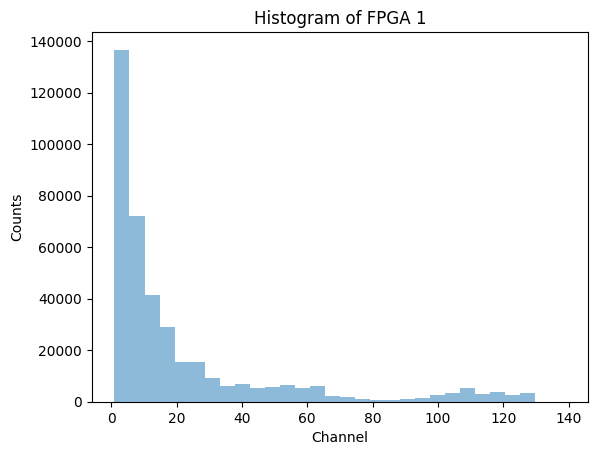

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(1)
plt.hist(FPGA_0.index, bins = 30, alpha=0.5, weights = FPGA_0.values) 
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.title('Histogram of FPGA 0')

plt.figure(2)
plt.hist(FPGA_1.index, bins = 30, alpha=0.5, weights = FPGA_1.values) 
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.title('Histogram of FPGA 1')
#print(FPGA_0.index)
